In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("adult.csv",header=None)
df.columns=['age','workclass','education','marital-status','occupation','race','sex','capital-gain','capital-loss','hours/week','country','income']
print(df)

       age          workclass      education       marital-status  \
0       52   Self-emp-not-inc        HS-grad   Married-civ-spouse   
1       31            Private        Masters        Never-married   
2       42            Private      Bachelors   Married-civ-spouse   
3       37            Private   Some-college   Married-civ-spouse   
4       30          State-gov      Bachelors   Married-civ-spouse   
...    ...                ...            ...                  ...   
48238   32            Private        Masters        Never-married   
48239   22            Private   Some-college        Never-married   
48240   27            Private     Assoc-acdm   Married-civ-spouse   
48241   58            Private        HS-grad              Widowed   
48242   22            Private        HS-grad        Never-married   

             occupation                 race      sex  capital-gain  \
0       Exec-managerial                White     Male             0   
1        Prof-specialty      

In [2]:
print(df.shape)
print(df.head())

(48243, 12)
   age          workclass      education       marital-status  \
0   52   Self-emp-not-inc        HS-grad   Married-civ-spouse   
1   31            Private        Masters        Never-married   
2   42            Private      Bachelors   Married-civ-spouse   
3   37            Private   Some-college   Married-civ-spouse   
4   30          State-gov      Bachelors   Married-civ-spouse   

         occupation                 race      sex  capital-gain  capital-loss  \
0   Exec-managerial                White     Male             0             0   
1    Prof-specialty                White   Female         14084             0   
2   Exec-managerial                White     Male          5178             0   
3   Exec-managerial                Black     Male             0             0   
4    Prof-specialty   Asian-Pac-Islander     Male             0             0   

   hours/week         country income  
0          45   United-States   >50K  
1          50   United-States   

In [3]:
df['income'].value_counts() 

 <=50K    24720
 >50K     23523
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

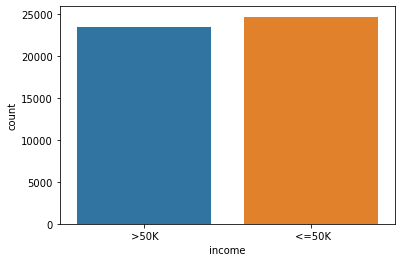

In [4]:
import seaborn as sns
sns.countplot(data=df,x='income')

In [5]:
print(df.isna().sum())
print (("-"*40))
print(df.info())

age                0
workclass          0
education          0
marital-status     0
occupation         0
race               0
sex                0
capital-gain       0
capital-loss       0
hours/week         0
country           12
income             0
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48243 entries, 0 to 48242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48243 non-null  int64 
 1   workclass       48243 non-null  object
 2   education       48243 non-null  object
 3   marital-status  48243 non-null  object
 4   occupation      48243 non-null  object
 5   race            48243 non-null  object
 6   sex             48243 non-null  object
 7   capital-gain    48243 non-null  int64 
 8   capital-loss    48243 non-null  int64 
 9   hours/week      48243 non-null  int64 
 10  country         48231 non-null  object
 11  income  

In [6]:
print (df.shape)
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
df.dropna(how='any',inplace=True)
print (df.shape)
print (df.head(10))

(48243, 12)
(45178, 12)
    age          workclass      education       marital-status  \
0    52   Self-emp-not-inc        HS-grad   Married-civ-spouse   
1    31            Private        Masters        Never-married   
2    42            Private      Bachelors   Married-civ-spouse   
3    37            Private   Some-college   Married-civ-spouse   
4    30          State-gov      Bachelors   Married-civ-spouse   
6    43   Self-emp-not-inc        Masters             Divorced   
7    40            Private      Doctorate   Married-civ-spouse   
8    56          Local-gov      Bachelors   Married-civ-spouse   
11   57        Federal-gov      Bachelors   Married-civ-spouse   
12   47            Private    Prof-school   Married-civ-spouse   

          occupation                 race      sex  capital-gain  \
0    Exec-managerial                White     Male             0   
1     Prof-specialty                White   Female         14084   
2    Exec-managerial                White    

In [7]:
for c in df[df.columns]:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
37    1402
36    1364
38    1335
39    1326
41    1311
      ... 
83       9
82       7
88       3
85       3
86       1
Name: age, Length: 72, dtype: int64
---- workclass ---
 Private             32038
 Self-emp-not-inc     3927
 Local-gov            3285
 Self-emp-inc         2274
 State-gov            1967
 Federal-gov          1673
 Without-pay            14
Name: workclass, dtype: int64
---- education ---
 HS-grad         13074
 Some-college     9350
 Bachelors        9296
 Masters          3463
 Assoc-voc        1995
 Assoc-acdm       1520
 Prof-school      1354
 11th             1166
 10th              938
 Doctorate         935
 7th-8th           627
 9th               505
 12th              435
 5th-6th           312
 1st-4th           163
 Preschool          45
Name: education, dtype: int64
---- marital-status ---
 Married-civ-spouse       26863
 Never-married            10666
 Divorced                  5118
 Separated                 1071
 Widowed               

In [8]:
for i in df.columns :
    print ("---- %s ---" % i)
    print (df[i].nunique())

---- age ---
72
---- workclass ---
7
---- education ---
16
---- marital-status ---
7
---- occupation ---
14
---- race ---
5
---- sex ---
2
---- capital-gain ---
118
---- capital-loss ---
90
---- hours/week ---
94
---- country ---
41
---- income ---
2


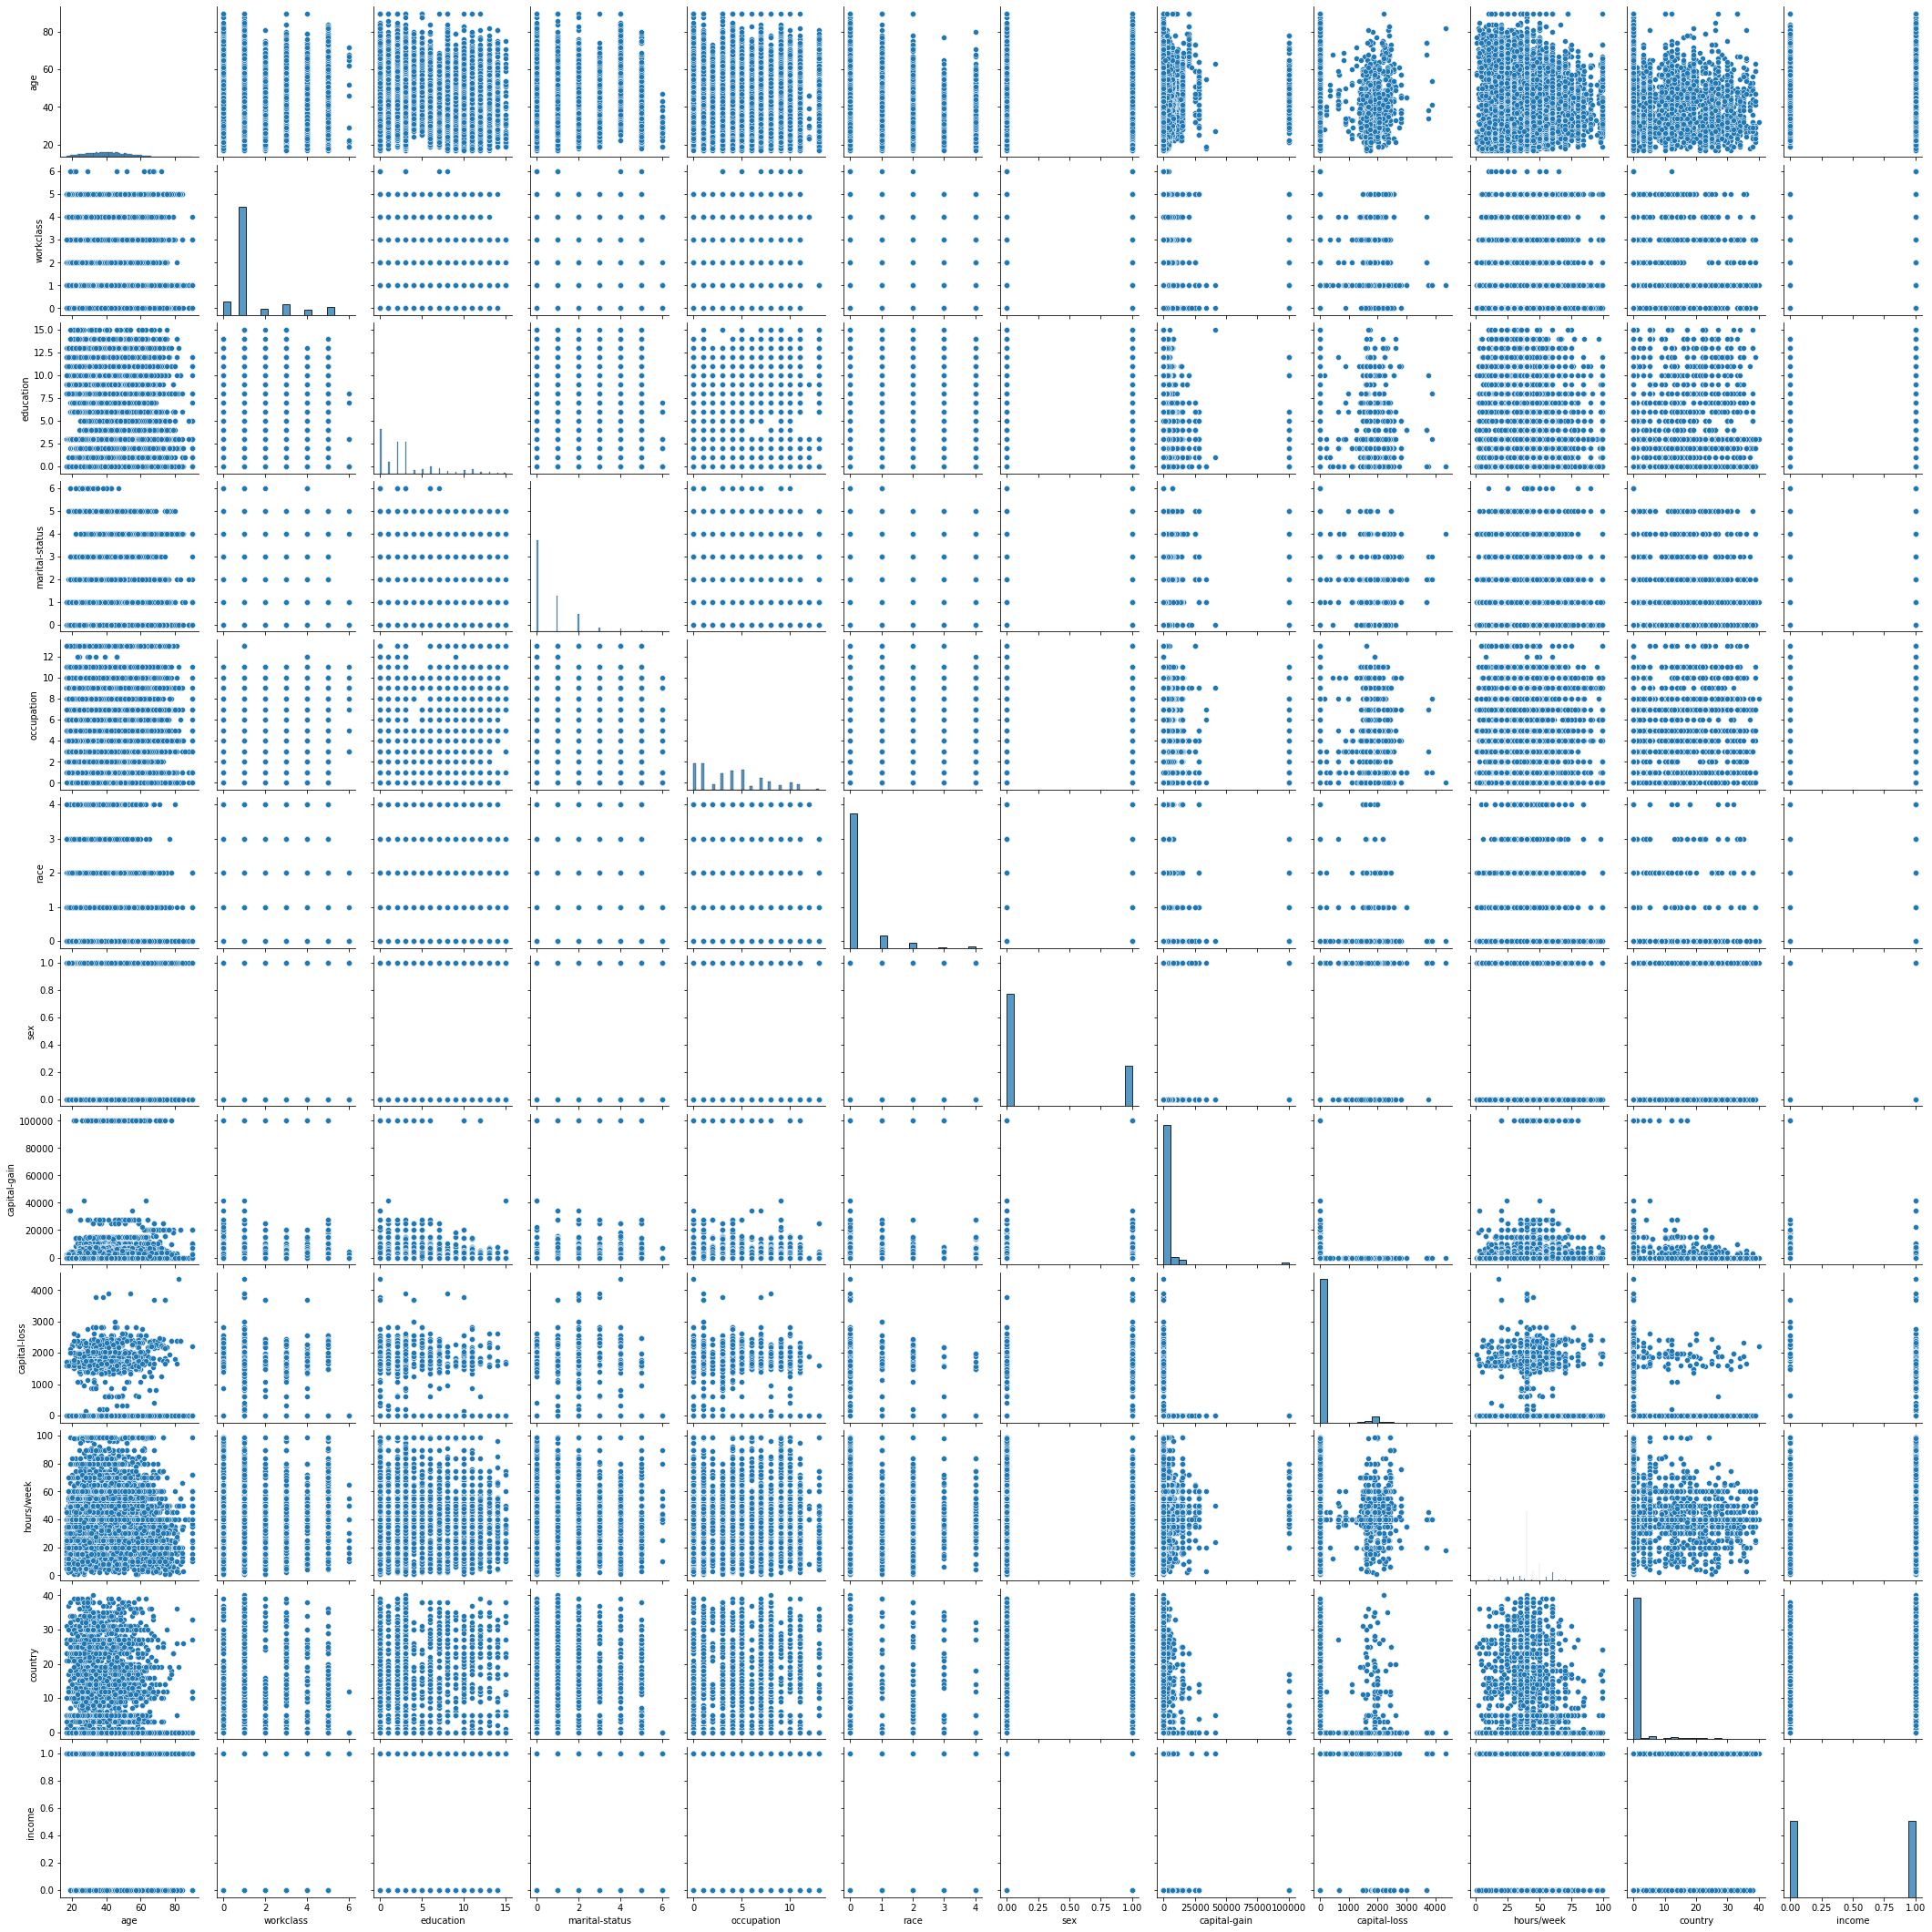

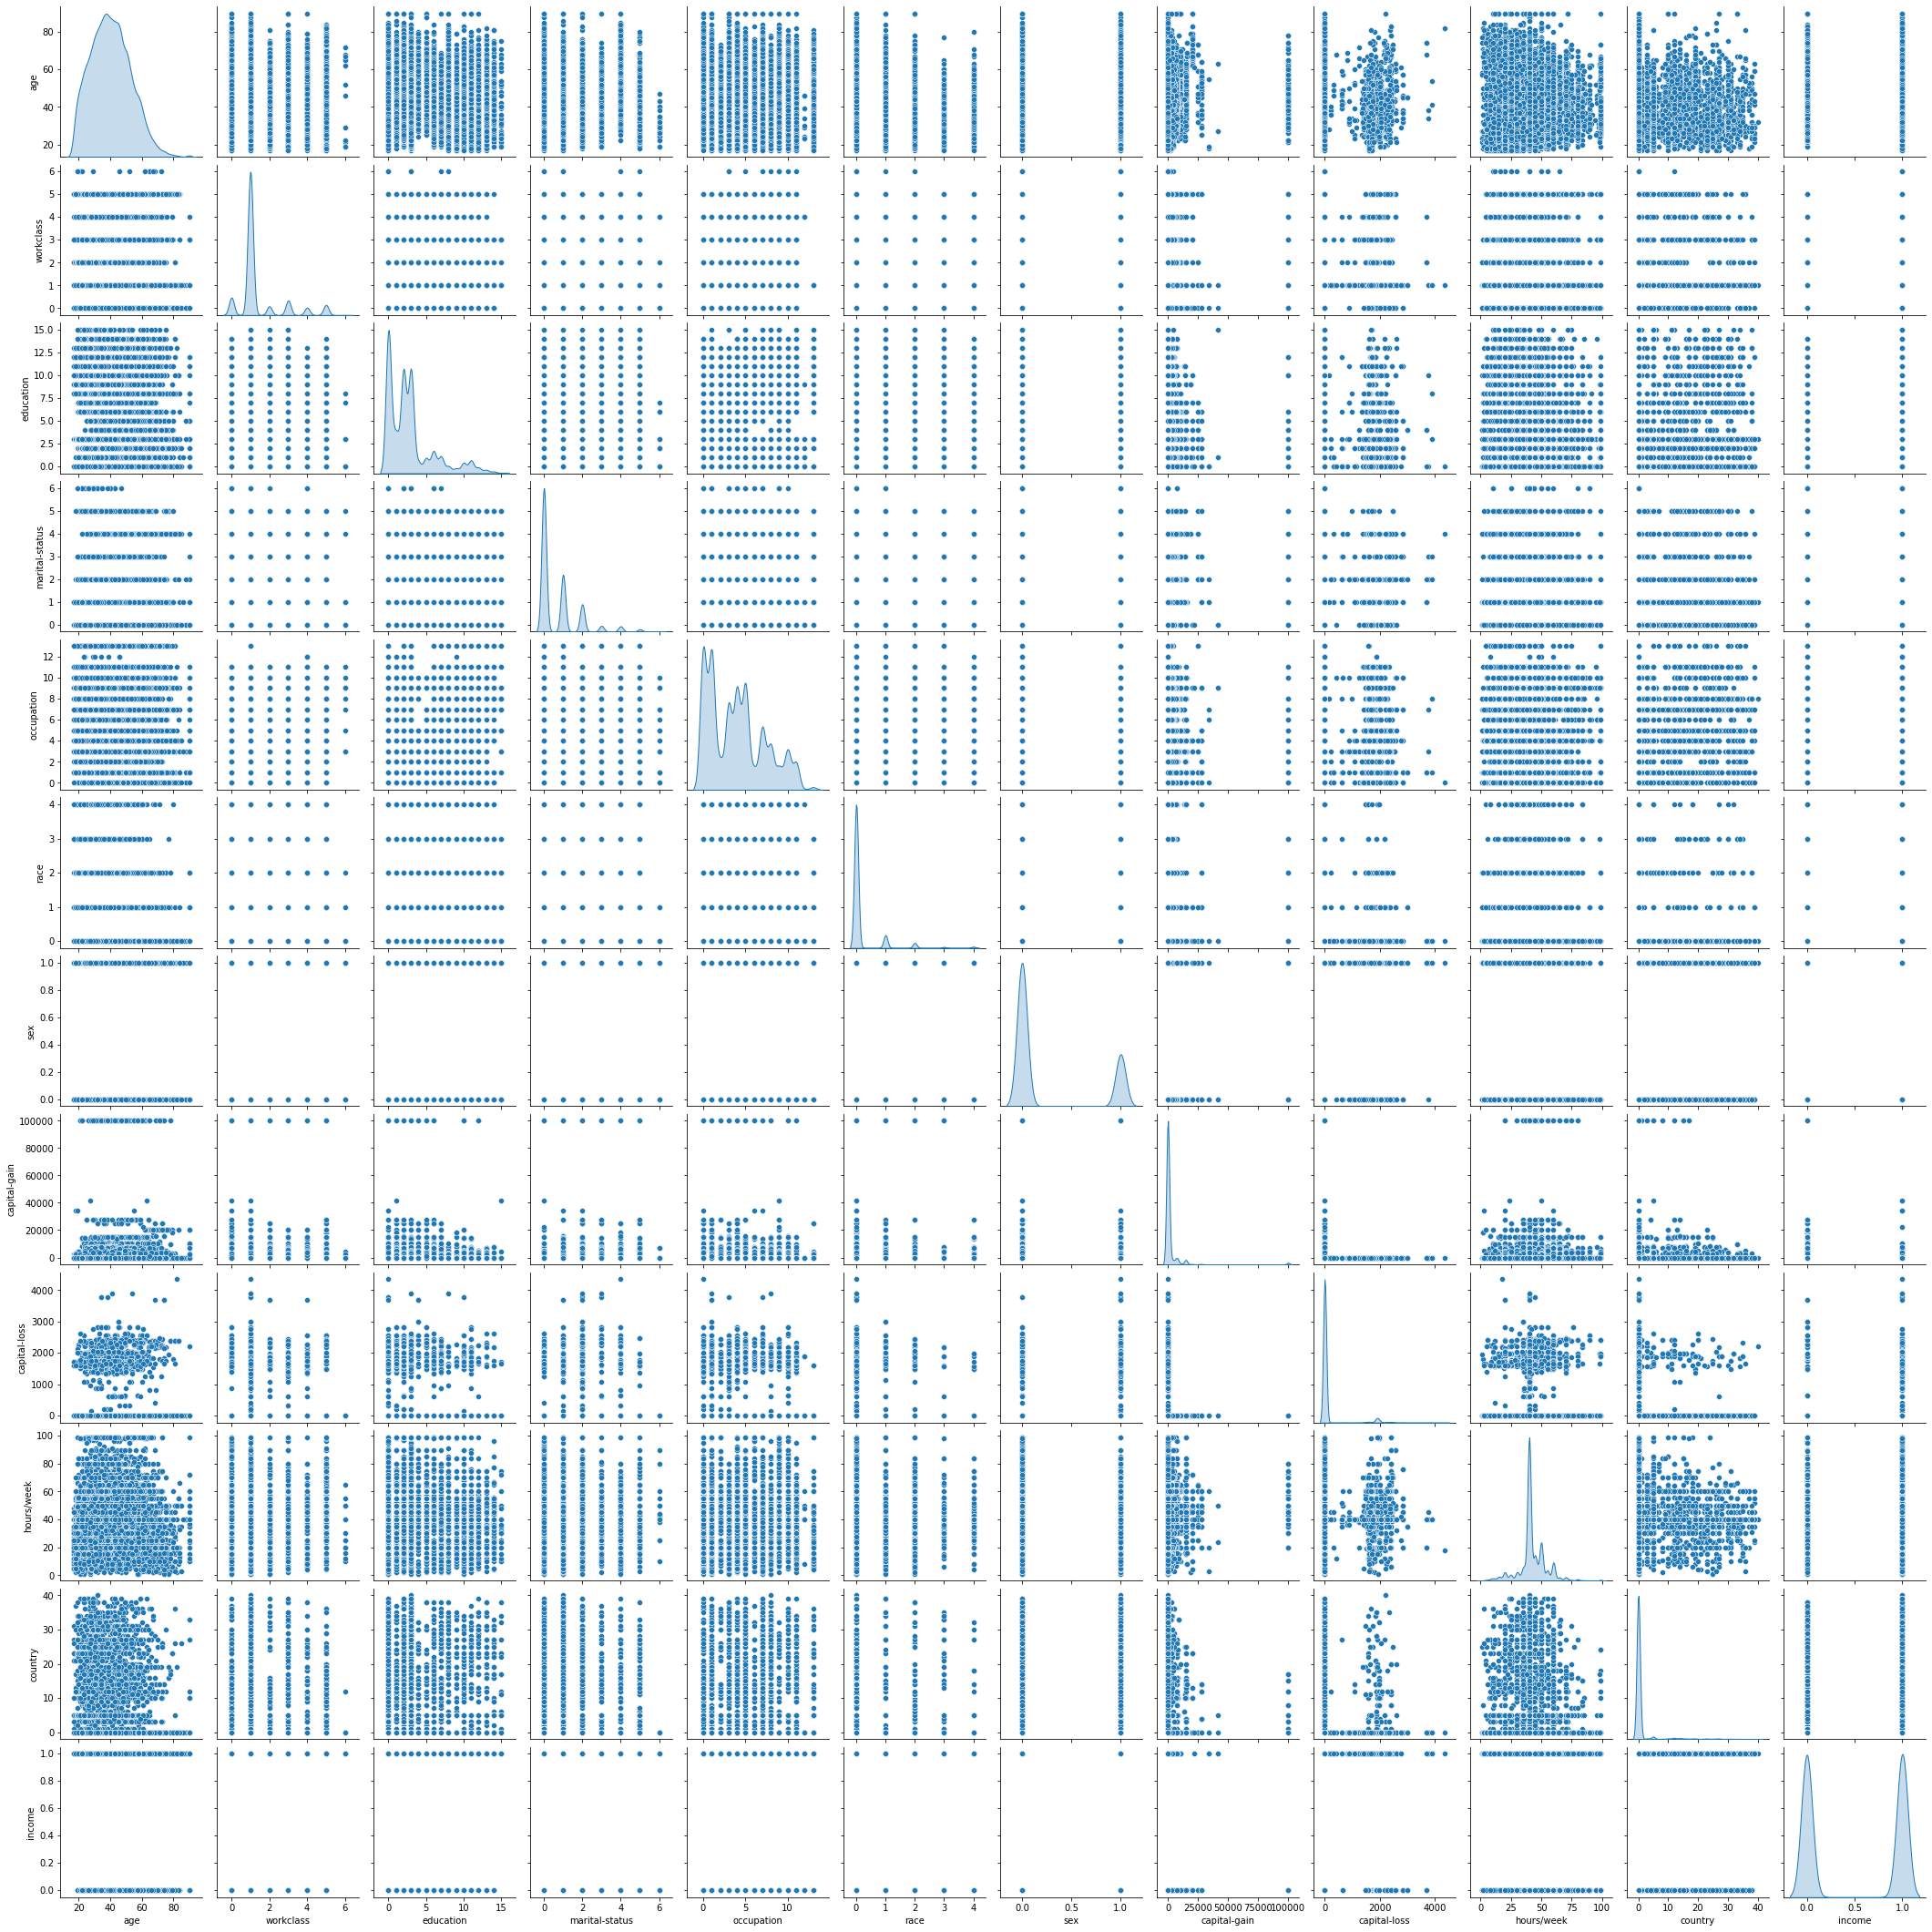

In [56]:
sns.pairplot(df[['age','workclass','education','marital-status','occupation','race','sex','capital-gain','capital-loss','hours/week','country','income']])
sns.pairplot(df[['age','workclass','education','marital-status','occupation','race','sex','capital-gain','capital-loss','hours/week','country','income']],diag_kind='kde')

In [10]:
def data_cleanup(df):
    '''
    df: pandas dataframe
    '''
    if type(df)!=pd.core.frame.DataFrame:
        raise ValueError('input is not a pandas dataframe')
    working_df = df.copy()
    cols = working_df.columns
    converted_columns = {}
    for col in cols:
        if working_df[col].dtype == 'O':
            unique_values = working_df[col].unique()
            converted_values = {v:k for k,v in enumerate(unique_values)}
            for value in unique_values:
                working_df[col] = working_df[col].replace(value, converted_values[value])
            converted_columns[col] = converted_values
    return working_df, converted_columns
clean_df,coverted=data_cleanup(df)
clean_df.head()
df=clean_df
df

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours/week,country,income
0,52,0,0,0,0,0,0,0,0,45,0,0
1,31,1,1,1,1,0,1,14084,0,50,0,0
2,42,1,2,0,0,0,0,5178,0,40,0,0
3,37,1,3,0,0,1,0,0,0,80,0,0
4,30,2,2,0,1,2,0,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48238,32,1,1,1,2,2,0,0,0,11,8,1
48239,22,1,3,1,6,0,0,0,0,40,0,1
48240,27,1,7,0,2,0,1,0,0,38,0,1
48241,58,1,0,4,3,0,1,0,0,40,0,1


### salary_map={' <=50K':1,' >50K':0}  df['income']=df['income'].map(salary_map)

<AxesSubplot:>

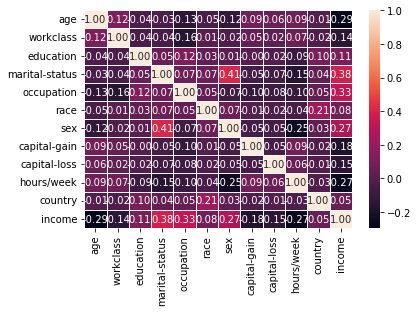

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',linewidths=1)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


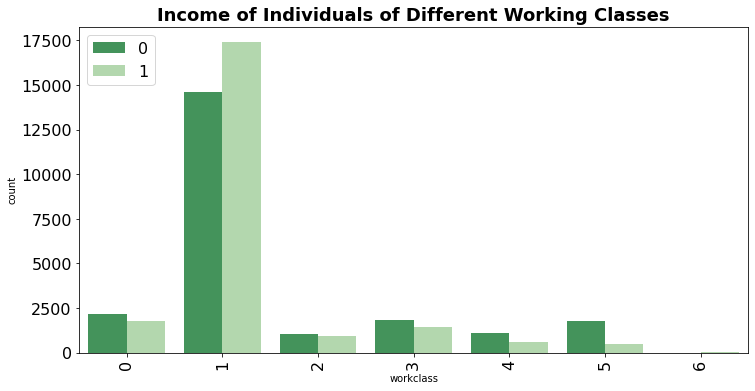

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


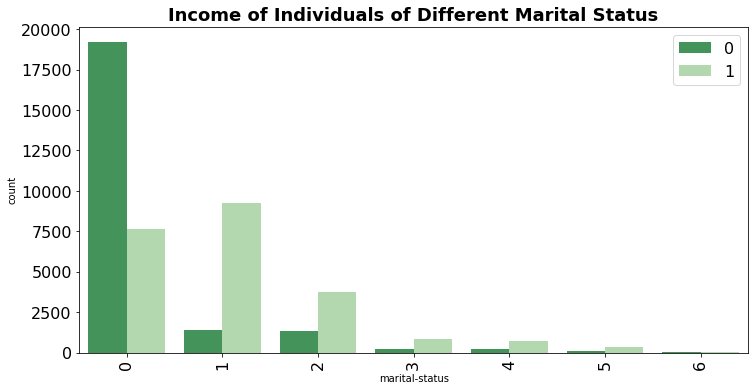

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['marital-status'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


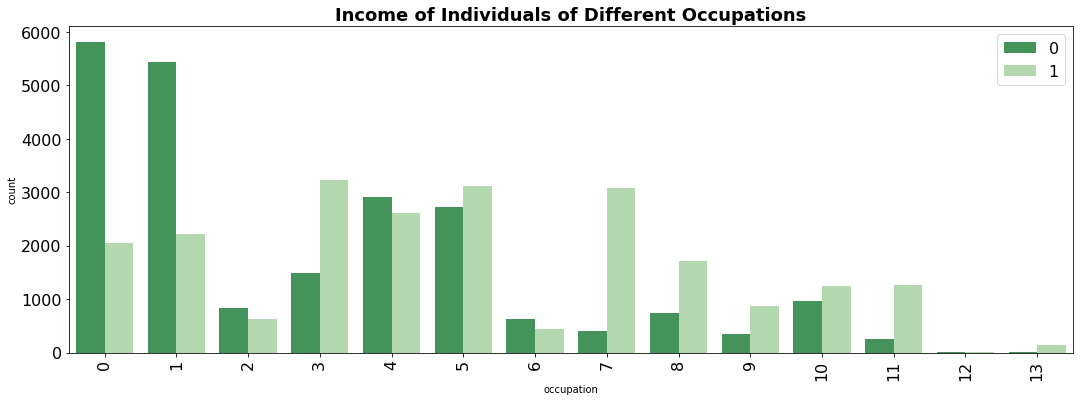

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['occupation'], hue = df['income'], palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [15]:
x=df[['age','workclass','education','marital-status','occupation','race','sex','capital-gain','capital-loss','hours/week','country']]
y=df['income']

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


In [17]:
le.classes_

array([0, 1], dtype=int64)

###### salary_map={' <=50K':1,' >50K':0}
###### df['income']=df['income'].map(salary_map)
###### print (df.tail(5))

## Categorise in US and Non-US candidates¶


In [18]:
print (df[['country','income']].groupby(['country']).mean())

           income
country          
0        0.494264
1        0.333333
2        0.785714
3        0.396648
4        0.307692
5        0.853550
6        0.343750
7        0.608696
8        0.287500
9        0.714286
10       0.383562
11       0.444444
12       0.415584
13       0.700000
14       0.388889
15       0.342857
16       0.379310
17       0.915493
18       0.575758
19       0.471831
20       0.466667
21       0.823529
22       0.869565
23       0.771186
24       0.294118
25       0.797297
26       0.576923
27       0.729323
28       0.558824
29       0.357143
30       0.900000
31       0.760000
32       0.419355
33       0.657143
34       0.837838
35       0.727273
36       0.526316
37       0.600000
38       0.714286
39       1.000000
40       1.000000


In [19]:
df.head(5)

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours/week,country,income
0,52,0,0,0,0,0,0,0,0,45,0,0
1,31,1,1,1,1,0,1,14084,0,50,0,0
2,42,1,2,0,0,0,0,5178,0,40,0,0
3,37,1,3,0,0,1,0,0,0,80,0,0
4,30,2,2,0,1,2,0,0,0,40,1,0


In [20]:
print(df[['occupation','income']].groupby(['occupation']).mean())
print (("-"*40))
print(df[['marital-status','income']].groupby(['marital-status']).mean())
print (("-"*40))
print(df[['education','income']].groupby(['education']).mean())

              income
occupation          
0           0.261251
1           0.290731
2           0.431880
3           0.683273
4           0.473208
5           0.534040
6           0.407895
7           0.886076
8           0.700733
9           0.716981
10          0.566968
11          0.835752
12          0.727273
13          0.979310
----------------------------------------
                  income
marital-status          
0               0.285374
1               0.867804
2               0.735053
3               0.815126
4               0.756839
5               0.784722
6               0.268293
----------------------------------------
             income
education          
0          0.628958
1          0.204736
2          0.313898
3          0.571337
4          0.101604
5          0.100443
6          0.482707
7          0.494737
8          0.832536
9          0.800000
10         0.811301
11         0.848199
12         0.851485
13         0.884615
14         0.889571
15         1.0000

In [21]:
df[['race','income']].groupby('race').mean()

,income
race,
0,0.482038
1,0.690617
2,0.465133
3,0.769231
4,0.711864


In [22]:
df.head(5)

,age,workclass,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours/week,country,income
0,52,0,0,0,0,0,0,0,0,45,0,0
1,31,1,1,1,1,0,1,14084,0,50,0,0
2,42,1,2,0,0,0,0,5178,0,40,0,0
3,37,1,3,0,0,1,0,0,0,80,0,0
4,30,2,2,0,1,2,0,0,0,40,1,0


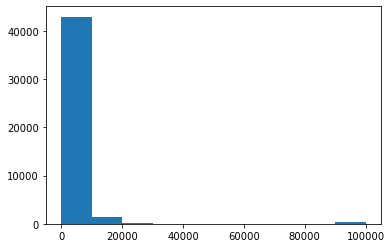

In [23]:
import matplotlib.pyplot as plt
x=df['capital-gain']
plt.hist(x,bins=None)
plt.show()

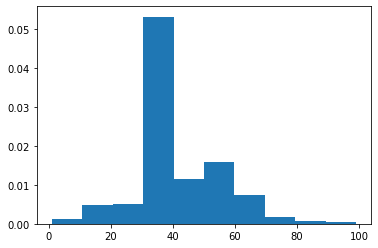

In [24]:
x= df['hours/week']
plt.hist(x,bins=None,density=True,histtype='bar')
plt.show()


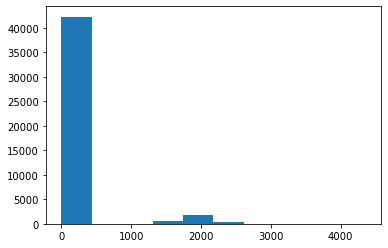

In [25]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_14788/2923323484.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.dtypes[column] == np.object:


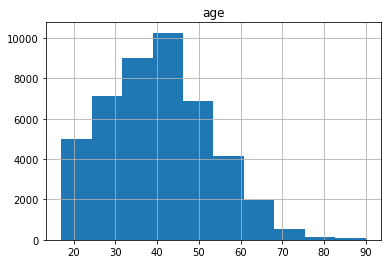

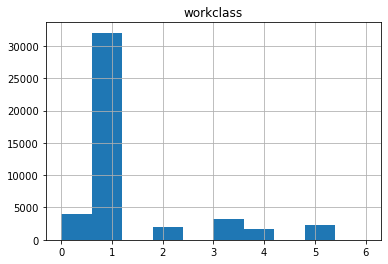

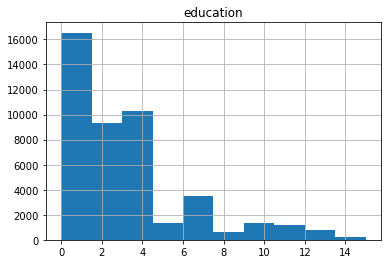

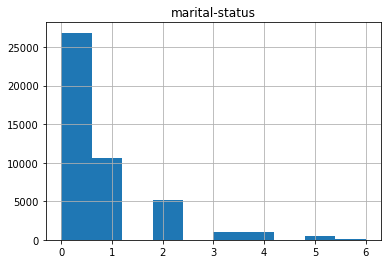

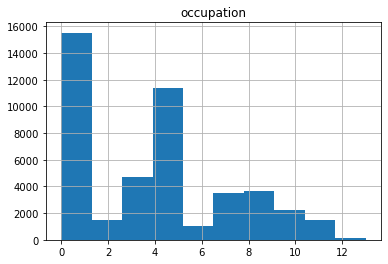

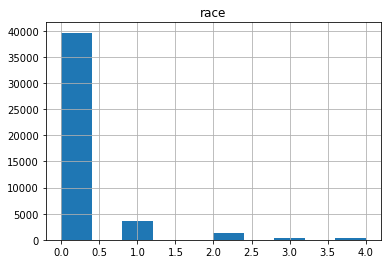

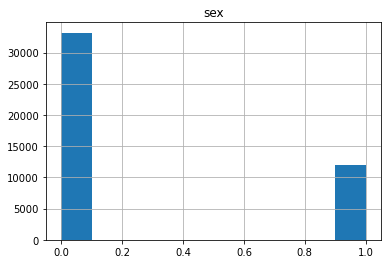

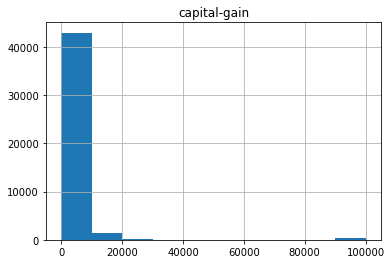

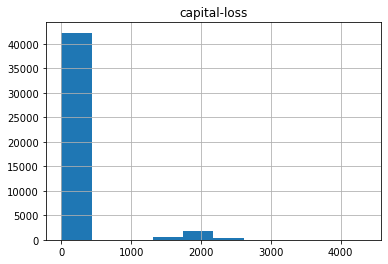

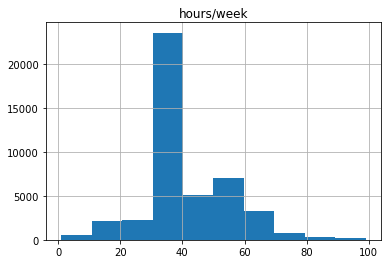

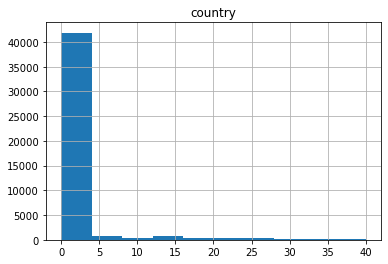

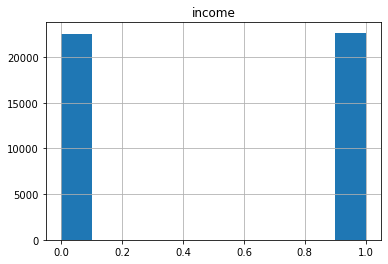

In [26]:
import matplotlib.pyplot as plt
import numpy as np
for column in df.columns:
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", title=column)
    else:
        df[column].hist()
        plt.title(column)
    plt.show()

In [27]:
df['age'].count()

45178

## Applying model for learning
### Divide data in training and test dataset 
###### 70% training data, 30% test data

In [28]:
from sklearn.model_selection import train_test_split
x=df[['age','workclass','education','marital-status','occupation','race','sex','capital-gain','capital-loss','hours/week','country']]
y=df['income']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
print ("Train dataset: {0}{1}".format(x_train.shape, y_train.shape))
print ("Test dataset: {0}{1}".format(x_test.shape, y_test.shape))

Train dataset: (31624, 11)(31624,)
Test dataset: (13554, 11)(13554,)


In [30]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


In [33]:
le.classes_

array([0, 1], dtype=int64)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
##print(x_train_std)

In [35]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

In [36]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

In [37]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)

Training Acc=  0.7051290159372628
Testing Acc =  0.7077615464069648


In [38]:
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)

Training Acc=  0.7598659246142171
Testing Acc =  0.7606610594658404


In [39]:
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc= ",train_acc)
print("Testing Acc = ",test_acc)

Training Acc=  0.7267581583607386
Testing Acc =  0.7293050022133688


In [40]:
from sklearn.metrics import classification_report
p=classification_report(y_test,y_pred_test)
print(p)1

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      6732
           1       0.89      0.53      0.66      6822

    accuracy                           0.73     13554
   macro avg       0.78      0.73      0.72     13554
weighted avg       0.78      0.73      0.72     13554



In [41]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred_test)
print(cn)

[[6303  429]
 [3240 3582]]


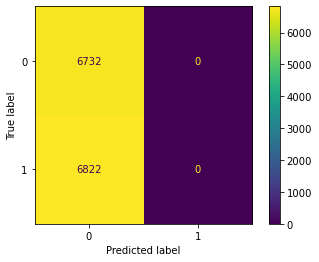

In [42]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(clf,x_test,y_test)

<AxesSubplot:>

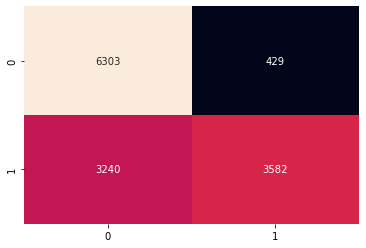

In [43]:
sns.heatmap(cn,annot=True,fmt='d',cbar=False)

In [44]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC

clf1=Perceptron()
clf2 =LogisticRegression()
clf3=DecisionTreeClassifier()
clf4 =KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['PERC','LR','DT','KNN','GNB','SVC']
acc={}
t={}
import time 
for classifier,classifier_name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    et=time.time()
    acc[classifier_name]=accuracy_score(y_pred,y_test)
    t[classifier_name]=et-st
    
print(acc)
max(acc.values())

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PERC': 0.7077615464069648, 'LR': 0.7983621071270474, 'DT': 0.899734395750332, 'KNN': 0.8200531208499336, 'GNB': 0.6732329939501254, 'SVC': 0.6299985244208351}


0.899734395750332

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC

clf1=Perceptron()
clf2 =LogisticRegression()
clf3=DecisionTreeClassifier()
clf4 =KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['PERC','LR','DT','KNN','GNB','SVC']
acc={}
t={}
import time 
for classifier,classifier_name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train_std,y_train)
    y_pred=classifier.predict(x_test_std)
    et=time.time()
    acc[classifier_name]=accuracy_score(y_pred,y_test)
    t[classifier_name]=et-st
    
print(acc)
max(acc.values())

{'PERC': 0.7606610594658404, 'LR': 0.7985834440017707, 'DT': 0.8993655009591265, 'KNN': 0.8106831931533127, 'GNB': 0.688431459347794, 'SVC': 0.820348236682898}


0.8993655009591265

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC

clf1=Perceptron()
clf2 =LogisticRegression()
clf3=DecisionTreeClassifier()
clf4 =KNeighborsClassifier()
clf5=GaussianNB()
clf6=SVC()

clf=[clf1,clf2,clf3,clf4,clf5,clf6]
name=['PERC','LR','DT','KNN','GNB','SVC']
acc={}
t={}
import time 
for classifier,classifier_name in zip(clf,name):
    st=time.time()
    classifier.fit(x_train_mms,y_train)
    y_pred=classifier.predict(x_test_mms)
    et=time.time()
    acc[classifier_name]=accuracy_score(y_pred,y_test)
    t[classifier_name]=et-st
    
print(acc)
max(acc.values())

{'PERC': 0.7293050022133688, 'LR': 0.8010919285819684, 'DT': 0.8998081747085731, 'KNN': 0.8111258669027593, 'GNB': 0.688431459347794, 'SVC': 0.8186513206433526}


0.8998081747085731

In [62]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier   ##Bagging  (Bootstrap sample ) random sample with replacement
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier                 ## Boosting classifier
from sklearn.ensemble import VotingClassifier                                              ##  Stacking method

clf1=BaggingClassifier()
clf2=RandomForestClassifier()
clf3=ExtraTreesClassifier()
clf4=AdaBoostClassifier()
clf5=GradientBoostingClassifier()

clf6=VotingClassifier(estimators=[('Bag',clf1),('rf',clf2),('et',clf3),('ada',clf4),('gtb',clf5)],
                     voting='soft')

clf6.fit(x_train,y_train)
y_pred=clf6.predict(x_test)

from sklearn.metrics import accuracy_score
print('Test Acc = ', accuracy_score(y_test,y_pred))

Test Acc =  0.9141212926073484


In [78]:
fe=rf.feature_importances_
print(fe)

[0.23136978 0.04163426 0.08520739 0.2204536  0.12145397 0.01798481
 0.0278292  0.09367985 0.02992656 0.1122446  0.01821598]


<BarContainer object of 11 artists>

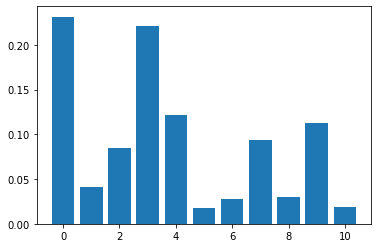

In [79]:
import matplotlib.pyplot as plt
plt.bar(range(0,x.shape[1]),fe)

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
cl=ExtraTreesClassifier()
cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
from sklearn.metrics import accuracy_score
print((accuracy_score(y_test,y_pred)))

0.9154493138556884


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7372
           1       0.87      0.96      0.91      6182

    accuracy                           0.92     13554
   macro avg       0.92      0.92      0.92     13554
weighted avg       0.92      0.92      0.92     13554



In [75]:
from sklearn.ensemble import AdaBoostClassifier
cl=AdaBoostClassifier()
cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
from sklearn.metrics import accuracy_score
print((accuracy_score(y_test,y_pred)))

0.8295706064630367


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6838
           1       0.82      0.84      0.83      6716

    accuracy                           0.83     13554
   macro avg       0.83      0.83      0.83     13554
weighted avg       0.83      0.83      0.83     13554



In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_new=SelectKBest(chi2,k=5).fit_transform(x,y)
print(x_new.shape)

(45178, 5)


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(y_test,y_pred))

Accuracy=  0.9094732182381585


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7395
           1       0.86      0.95      0.90      6159

    accuracy                           0.91     13554
   macro avg       0.91      0.91      0.91     13554
weighted avg       0.91      0.91      0.91     13554



In [53]:
from sklearn.decomposition import PCA       ##unsupervised learning only trainging data wllbe given
pca=PCA(n_components=5)
pca.fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_pca,y_train)
y_pred=rf.predict(x_test_pca)
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(y_test,y_pred))

Accuracy=  0.8902169101372288


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7362
           1       0.87      0.96      0.91      6192

    accuracy                           0.91     13554
   macro avg       0.91      0.92      0.91     13554
weighted avg       0.92      0.91      0.91     13554



In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=1)
lda.fit(x_train,y_train)
x_train_lda=pca.transform(x_train)
x_test_lda=pca.transform(x_test)
rf=RandomForestClassifier()
rf.fit(x_train_lda,y_train)
y_pred=rf.predict(x_test_lda)
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(y_test,y_pred))

Accuracy=  0.8906595838866755


In [51]:
from sklearn.metrics import classification_report
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6732
           1       0.95      0.86      0.90      6822

    accuracy                           0.91     13554
   macro avg       0.91      0.91      0.91     13554
weighted avg       0.91      0.91      0.91     13554

